<a href="https://colab.research.google.com/github/hemachelli/Fmml2024/blob/main/Module%20-2%3A%20Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)


```
Coordinator: Aswin Jose
```

---



This lab will be based upon t-SNE which is a dimensionality reduction algorithm used to visualize high dimensional datasets.

t-SNE stands for t-Distributed Stochastic Neighbor Embedding. It is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008 (Link to the paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

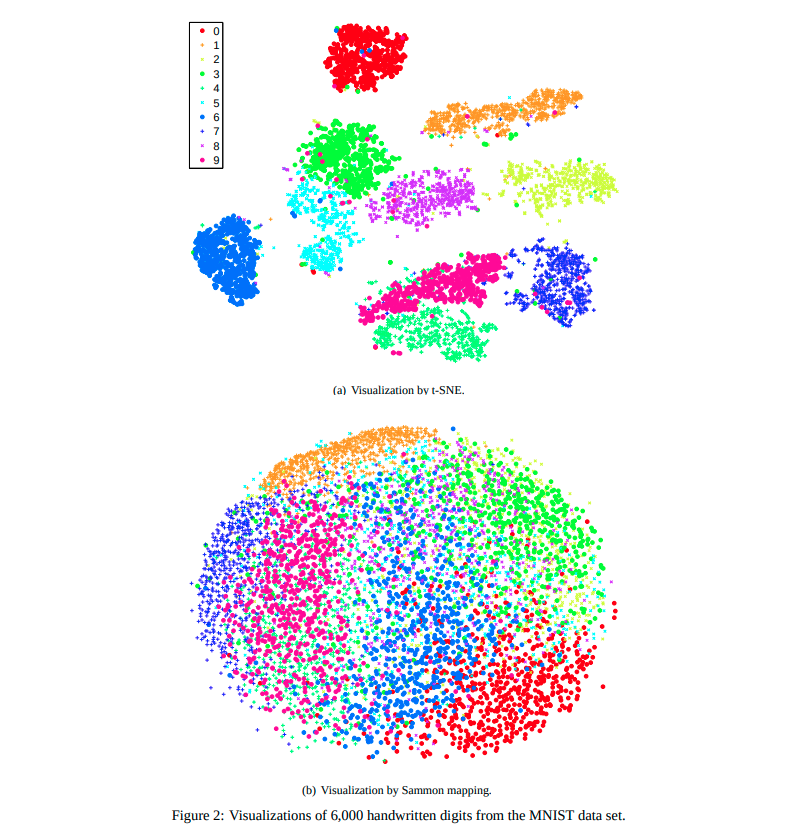

t-SNE has a tuneable parameter, **perplexity** which balances attention between the local and global aspects of your data. It is a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of t-SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

Also the t-SNE algorithm doesn’t always produce similar output on successive runs as there are additional hyperparameters related to the optimization process.

### HOW DOES T-SNE WORK??

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

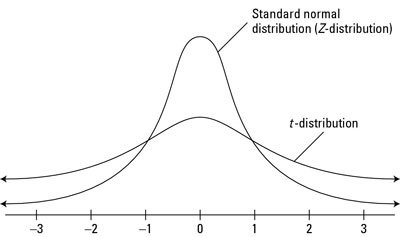

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [ ]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



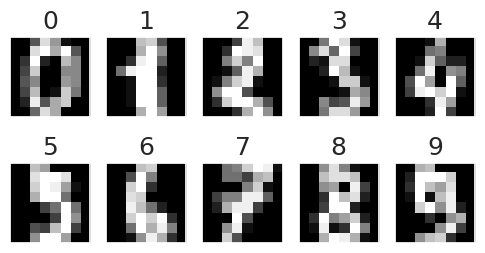

In [ ]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [ ]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [ ]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

#### Visualizing the data in the projected space

---



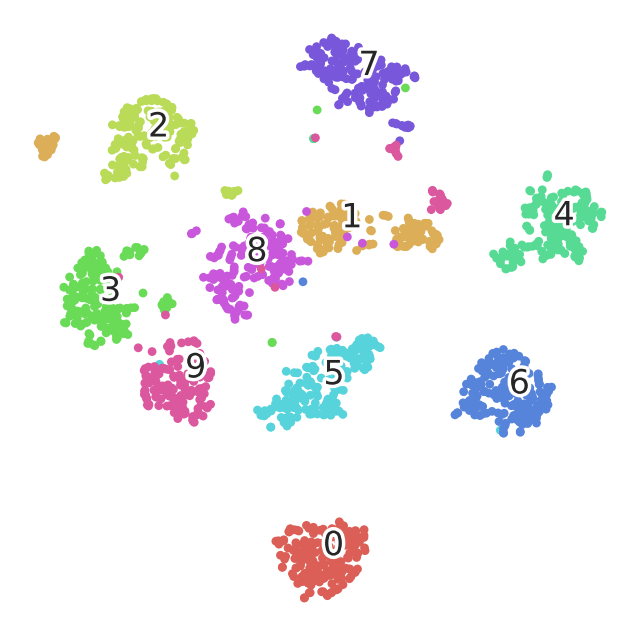

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7ef13ee21ab0>)

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

# Tweaking some of the hyperparameters to better understand their role

---

### Changing the PERPLEXITY values


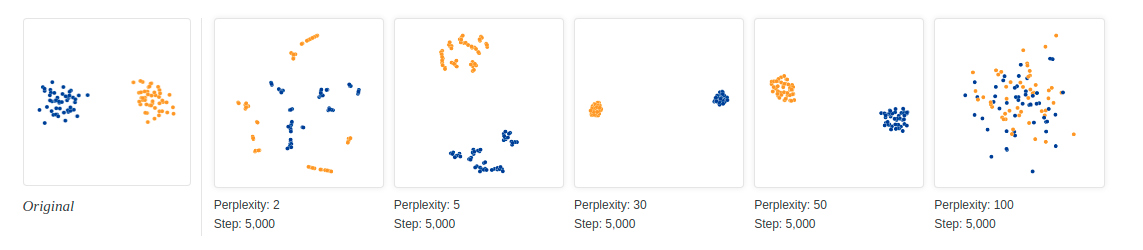

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.



---


1. n_components : 2
2. perplexity : **5**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

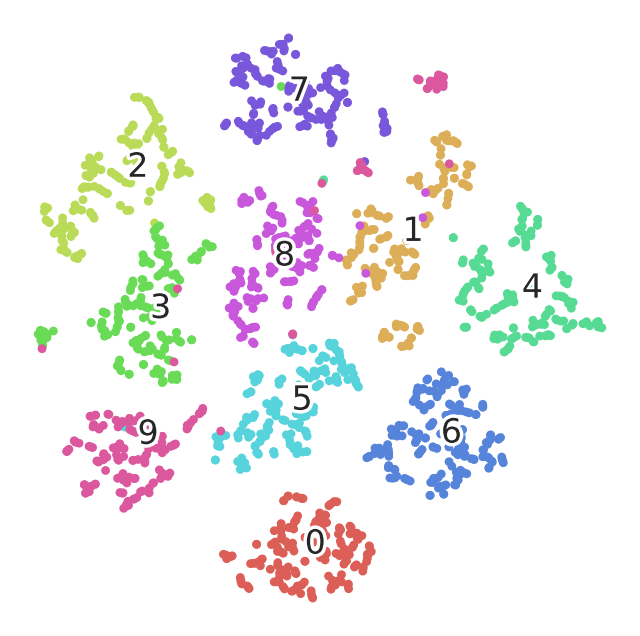

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7ef13c84d180>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.





---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

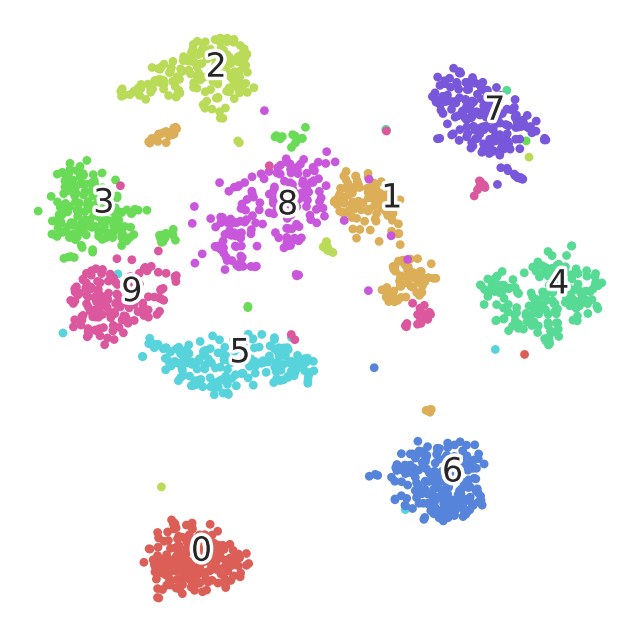

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7ef13a70a8f0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

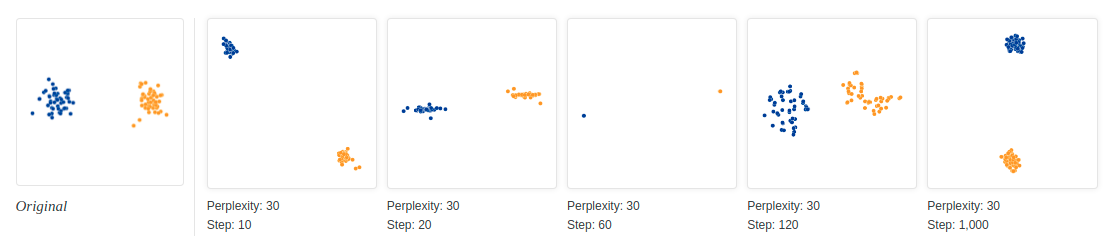

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **250**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


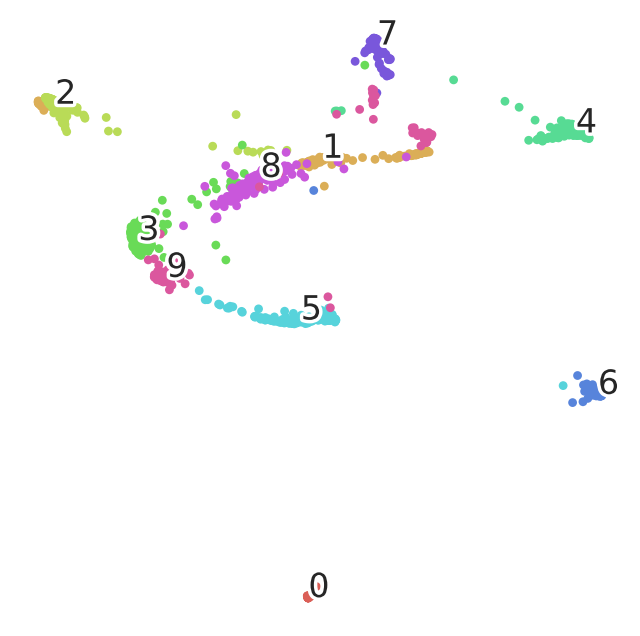

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7ef138db3370>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


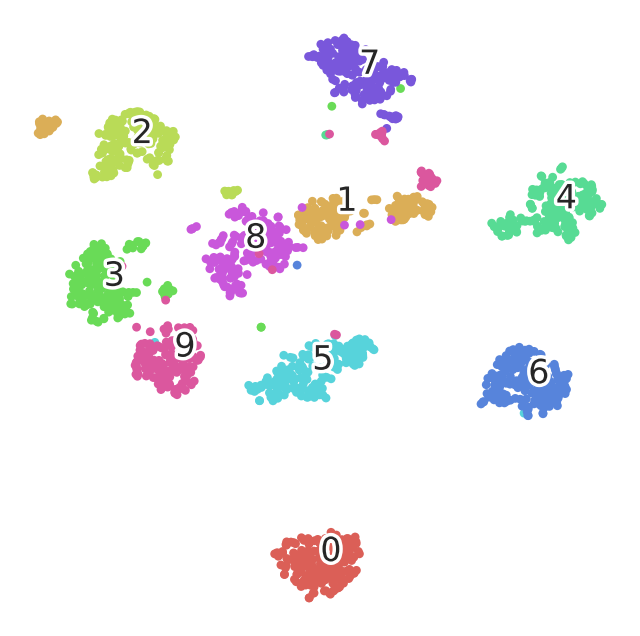

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7ef138e49c90>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : **‘exact’**


---

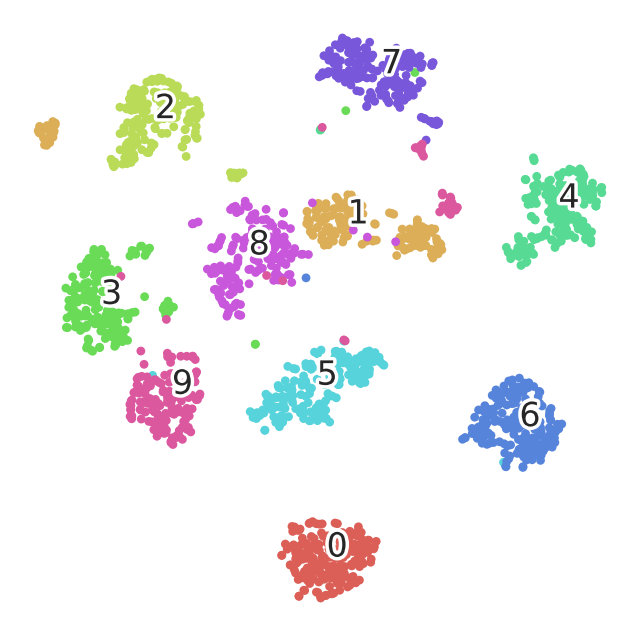

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7ef13a70b820>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


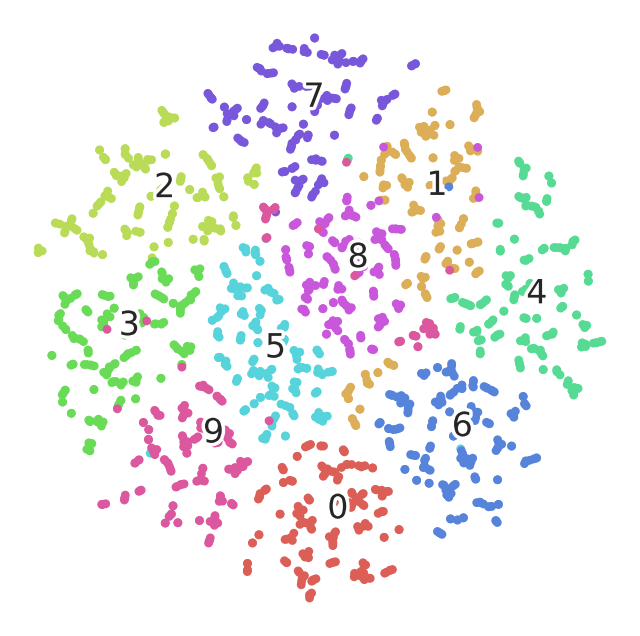

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7ef138d341f0>)

In [ ]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 2
number_iterations = 1000
method = "barnes_hut"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)



---

## Exercise:

1. Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


>##### Pointers:

> a. Which of the two algorithms is linear and which one is non-linear?    
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?    
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?    
d. Can you comment on which one of the two is computationally more expensive?

2. How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

3. What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)


01Ans)


PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) are both dimensionality reduction techniques but serve different purposes and operate quite differently. Here’s a comparison of the two:

1. Purpose

PCA is primarily a linear technique used to reduce the dimensionality of a dataset while retaining as much variance as possible. It does this by projecting the data onto a lower-dimensional space where the new axes (principal components) are the directions of maximum variance.

t-SNE is a non-linear technique designed for visualizing high-dimensional data in a lower-dimensional space (often 2D or 3D). Its main goal is to preserve local relationships (similarities between points) in the data.


2. Approach

PCA transforms the data linearly by finding orthogonal axes (principal components) based on variance. It does not specifically focus on preserving the local structure of the data.

t-SNE is a probabilistic method. It first converts pairwise distances between points into probabilities, then tries to ensure that similar points in high-dimensional space stay close in lower-dimensional space.


3. Speed and Scalability

PCA is computationally faster and scales well with larger datasets since it is primarily based on linear algebra operations (eigenvalue decomposition or singular value decomposition).

t-SNE is computationally expensive and does not scale well with very large datasets because it involves pairwise distance calculations and iterative optimization. However, approximations like Barnes-Hut t-SNE improve its scalability.


4. Global vs. Local Structure

PCA preserves global structure, meaning that it captures the overall variance of the dataset across all points but may miss local clusters and fine structures.

t-SNE focuses on preserving the local structure of the data, meaning it maintains the distances between points that are near each other but often distorts the global structure, making it harder to interpret overall trends in the data.


5. Interpretation

PCA is interpretable, as each principal component represents a linear combination of the original features, and the contribution of each feature to a component is clear.

t-SNE is less interpretable, as it is non-linear and based on probabilistic transformations, so the relationship between the output dimensions and the original features is not straightforward.


6. Dimensionality of Output

PCA can reduce the data to any number of dimensions (as long as it’s less than or equal to the original number of dimensions).

t-SNE is typically used to reduce data to two or three dimensions for visualization, and using more than that is unusual and not recommended.


7. Use Cases

PCA is better for compression, noise reduction, and exploratory data analysis when understanding the variance in the data is important.

t-SNE is mainly used for visualizing high-dimensional data, especially when you want to reveal clusters, patterns, or groupings that might not be immediately obvious with linear methods.


Advantages of PCA

Fast and scalable for large datasets.

Provides a straightforward linear interpretation of the data.

Preserves global structure and is useful for compression or identifying directions of maximum variance.


Disadvantages of PCA

Not effective for non-linear relationships.

It doesn’t focus on preserving local structure, which may be important in some data, particularly in clustering tasks.


Advantages of t-SNE

Excellent for visualizing high-dimensional data by maintaining local similarities.

Useful for revealing clusters or patterns in complex datasets.


Disadvantages of t-SNE

Computationally intensive and doesn’t scale well to large datasets.

May distort the global structure of the data.

Harder to interpret since it’s a non-linear method.

Prone to issues with different perplexity settings (a parameter that affects the balance between local and global structure).


In summary:

Use PCA when you need to reduce dimensionality for purposes like feature reduction, compression, or identifying directions of maximal variance.

Use t-SNE when you want to visualize high-dimensional data, especially when local structure or clusters are of interest.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


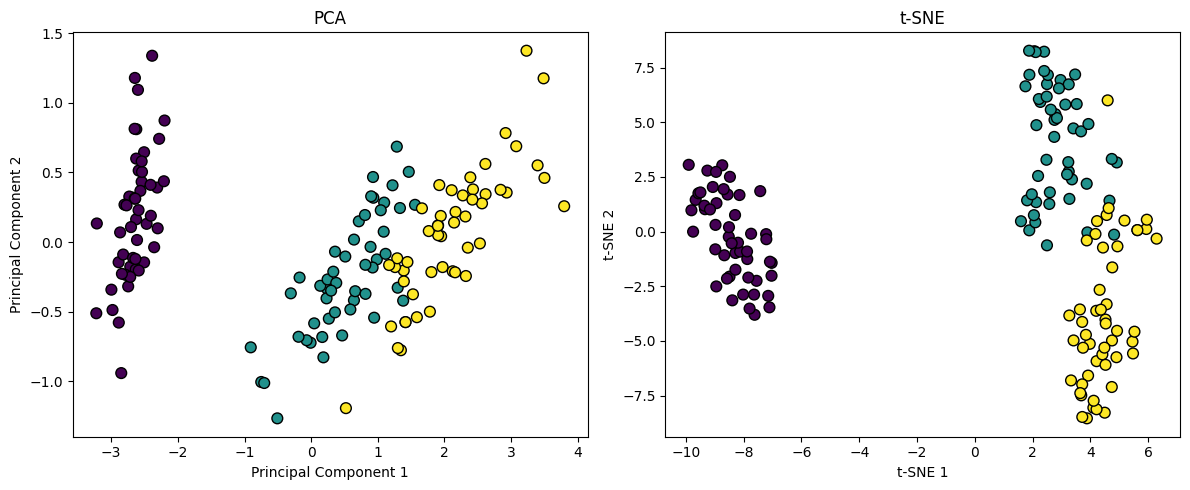

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

# Load a dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels (for coloring)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Plot PCA result
plt.figure(figsize=(12, 5))

# PCA plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# t-SNE plot
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.title('t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

1a)

PCA (Principal Component Analysis) is a linear algorithm because it projects the data onto a lower-dimensional space using linear combinations of the original features.

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear algorithm, as it transforms the data in a way that focuses on preserving local distances without assuming any linear relationships between the original features.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


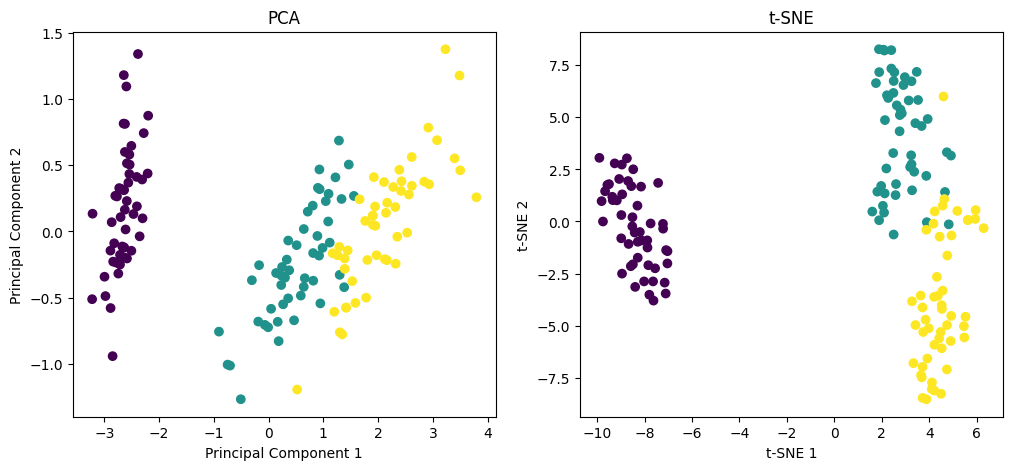

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

# Load a dataset (Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Plot PCA result
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot t-SNE result
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.show()

1b)

In many machine learning and optimization algorithms, non-linearity plays a critical role in capturing the complexity of certain data sets. Let’s discuss two well-known examples: neural networks and support vector machines (SVMs). The non-linearity in these algorithms allows them to model more complex relationships in data that linear algorithms would struggle to capture.

1. Neural Networks (NNs):

Non-linearity in Activation Functions: Neural networks rely on non-linear activation functions (like ReLU, sigmoid, tanh) applied after each layer. Without these non-linearities, the entire network would essentially be a linear function regardless of the number of layers. This is because a composition of linear functions is still linear.

How Non-linearity Helps:

Non-linear functions allow the network to model more complex relationships in data, including patterns that involve non-linear dependencies.

For example, in image recognition, neural networks can learn intricate features like edges, textures, or more abstract concepts like shapes and objects by stacking layers with non-linear transformations.

Non-linear activations make the neural network a universal approximator, meaning it can theoretically approximate any function, given enough hidden units and training.



2. Support Vector Machines (SVMs):

Non-linearity via the Kernel Trick: The standard SVM algorithm is a linear classifier that seeks to find a hyperplane separating data into different classes. However, many data sets are not linearly separable.

How Non-linearity Helps:

The kernel trick transforms data from the input space into a higher-dimensional feature space where linear separability is more likely. In this higher-dimensional space, even complex patterns (such as those involving curved decision boundaries) become easier to classify linearly.

For example, with a radial basis function (RBF) or polynomial kernel, the SVM can capture circular or more complex decision boundaries in the original data space.



Why Non-linearity is Important:

Flexibility: Non-linearity allows these models to capture a broader range of patterns, making them adaptable to more complex data structures.

Complex Boundaries: Many real-world problems involve non-linear relationships between inputs and outputs. Non-linear algorithms can learn decision boundaries that are curves, circles, or other shapes that would not be possible with purely linear methods.


In summary, non-linearity in both neural networks and SVMs helps in capturing complex, non-linear relationships in data, making them powerful tools for handling data sets with intricate patterns that simple linear models would miss.

In [ ]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate non-linear data (moons dataset)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert data to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

# Define a simple Neural Network model with ReLU non-linearity
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = torch.sigmoid(self.output(x))
        return x

# Create model, define loss function and optimizer
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/1000], Loss: {loss.item():.4f}')

print("Neural network trained! You can now see how it captures non-linear patterns in the data!")

Epoch [0/1000], Loss: 0.6888
Epoch [100/1000], Loss: 0.1152
Epoch [200/1000], Loss: 0.0589
Epoch [300/1000], Loss: 0.0540
Epoch [400/1000], Loss: 0.0524
Epoch [500/1000], Loss: 0.0513
Epoch [600/1000], Loss: 0.0503
Epoch [700/1000], Loss: 0.0495
Epoch [800/1000], Loss: 0.0487
Epoch [900/1000], Loss: 0.0478
Neural network trained! You can now see how it captures non-linear patterns in the data!


1c)


PCA (Principal Component Analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding) approach dimensionality reduction differently, and their objectives are distinct when it comes to preserving distances between points:

PCA:

Global Structure Preservation: PCA aims to preserve global variance in the data. It does this by projecting data onto a lower-dimensional space while keeping the points that are far apart in the higher-dimensional space still relatively far apart in the lower dimension.

Linear Method: Since PCA is a linear transformation, it does not capture complex, non-linear relationships. It's mainly used for projecting data to lower dimensions while maintaining as much variance (spread) in the data as possible.


t-SNE:

Local Structure Preservation: t-SNE focuses on preserving the local neighborhood relationships between data points. It aims to keep points that are close in high-dimensional space close in the lower-dimensional space.

Non-Linear Method: t-SNE is non-linear and does not prioritize preserving global distances (far-apart points may not stay far apart after transformation). Instead, its objective is to map high-dimensional data in such a way that similar data points cluster together, while less emphasis is placed on preserving the absolute distances between distant points.

Emphasis on Local Neighborhoods: t-SNE is designed to preserve the probability distributions over pairwise distances of points, meaning it tries to maintain the local neighborhoods of data points, making it ideal for visualizing clusters.


To summarize:

PCA preserves global distances between points, aiming to maintain the relative spacing between far-apart points when reducing dimensions.

t-SNE preserves local structure by ensuring that points close to each other in high dimensions remain close in the lower dimension. However, it does not necessarily maintain the global distances between distant points.


Thus, t-SNE does not behave like PCA in preserving global distances, and it instead focuses on preserving the local neighborhood of the data points. This makes t-SNE especially useful for visualizing data with complex clustering in a lower-dimensional space.

1d)


Between PCA and t-SNE, t-SNE is significantly more computationally expensive. Here’s a breakdown of why:

PCA:

Time Complexity: The most computationally expensive part of PCA is computing the eigenvalue decomposition or singular value decomposition (SVD) of the covariance matrix. For an input data matrix  with  samples and  features, the time complexity is approximately O(min(n^2d, d^2n)). This makes PCA relatively efficient, especially for moderate-sized datasets.

Linear Transformation: PCA performs a linear transformation, which is much simpler compared to non-linear methods like t-SNE.

Scalable: PCA can scale to large datasets quite well and can be completed in a relatively short time.


t-SNE:

Time Complexity: t-SNE has a much higher time complexity due to its reliance on computing pairwise distances between points and optimizing a non-linear objective function. For  samples, the time complexity is approximately O(n^2), meaning it becomes very expensive as the number of data points increases.

The Barnes-Hut t-SNE algorithm improves on this with an approximate time complexity of O(n log n), but it’s still significantly more computationally intensive than PCA.


Non-Linear Optimization: t-SNE involves iterating through an optimization process (often gradient descent) to minimize the difference between pairwise probability distributions in high- and low-dimensional spaces. This requires several iterations and is more computationally demanding than the straightforward linear projection in PCA.

Memory Usage: t-SNE also consumes more memory, especially when dealing with large datasets, as it needs to maintain and manipulate the pairwise distance matrix.


Conclusion:

PCA is computationally much cheaper than t-SNE, making it suitable for large datasets and quick dimensionality reduction.

t-SNE is computationally expensive due to its non-linear nature and quadratic time complexity. It’s often used for visualizing smaller datasets (typically up to a few thousand points) because of this limitation.


For large datasets, PCA is preferred when speed is crucial, while t-SNE is more appropriate for detailed visualizations of smaller datasets where local structure is key.

02Ans)

The computational complexity and runtime of t-SNE are influenced by both the size of the dataset (i.e., the number of samples) and the dimensionality of the data (i.e., the number of features). Here's a breakdown of how t-SNE scales:

1. Dataset Size (Number of Samples, )

The runtime of the original t-SNE algorithm scales quadratically with the number of samples , i.e., O(n²). This is due to the pairwise similarity computations required to measure how close every point is to every other point in the high-dimensional space.

O(n²) Time Complexity: The main bottleneck in t-SNE is calculating pairwise distances and constructing the probability distribution over pairs of points. This requires storing and processing an  similarity matrix, leading to a quadratic relationship in terms of computational time and memory.

Impact: As  increases, the time required grows quadratically, making t-SNE impractical for large datasets (more than a few thousand samples) unless approximations are used.


Optimized Variants:

Barnes-Hut t-SNE: An optimized version of t-SNE, Barnes-Hut t-SNE, reduces the complexity to O(n \log n). This approximation works by grouping points that are far from each other to reduce the number of pairwise computations. Although this is an improvement, it's still not ideal for very large datasets.

FFT-accelerated t-SNE: Some newer variants use Fast Fourier Transforms (FFT) to further speed up the process, but they still suffer from scaling limitations as  increases.


2. Dimensionality (Number of Features, )

The dimensionality  (the number of features) also affects the runtime, though not as dramatically as the number of samples.

O(n d) for Distance Calculations: t-SNE calculates the pairwise Euclidean distance between points in the high-dimensional space. For each pair of points, this involves  operations, which means the complexity scales linearly with the number of features.

Impact of Dimensionality: Although increasing the number of features makes t-SNE slower, it is generally less impactful compared to the number of samples. High dimensionality increases the time required to compute distances and might also affect how well t-SNE captures local neighborhoods, but the quadratic dependency on the number of points is the dominant factor.


Summary of Complexity:

Original t-SNE: O(n²) for  samples and O(nd) for  features.

Barnes-Hut t-SNE: O(n \log n) for  samples and O(nd) for  features.


Practical Implications:

Small Datasets: t-SNE works well for small to moderate datasets (typically up to a few thousand samples). It can handle high-dimensional data effectively, but the computational burden grows with the number of samples.

Large Datasets: For large datasets (e.g., tens or hundreds of thousands of samples), even Barnes-Hut t-SNE becomes computationally challenging. In such cases, other methods like UMAP (Uniform Manifold Approximation and Projection) may be preferred, as they offer faster runtime and similar quality in terms of local neighborhood preservation.


Runtime Examples:

For 1,000 samples and 50 dimensions, t-SNE might run in a few seconds to a minute depending on the implementation.

For 10,000 samples, runtime can increase significantly to several minutes or more.

For 100,000 samples, t-SNE might take several hours to run, even with optimizations like Barnes-Hut.


Thus, t-SNE's scaling properties make it computationally expensive for large datasets, primarily due to the quadratic growth with respect to the number of samples, while the effect of dimensionality is less severe in comparison.

t-SNE with 100 samples and 10 features took 0.74 seconds.
t-SNE with 100 samples and 50 features took 0.83 seconds.
t-SNE with 100 samples and 100 features took 0.65 seconds.
t-SNE with 100 samples and 500 features took 0.72 seconds.
t-SNE with 500 samples and 10 features took 3.91 seconds.
t-SNE with 500 samples and 50 features took 3.62 seconds.
t-SNE with 500 samples and 100 features took 4.23 seconds.
t-SNE with 500 samples and 500 features took 4.75 seconds.
t-SNE with 1000 samples and 10 features took 7.04 seconds.
t-SNE with 1000 samples and 50 features took 10.19 seconds.
t-SNE with 1000 samples and 100 features took 11.01 seconds.
t-SNE with 1000 samples and 500 features took 10.69 seconds.
t-SNE with 5000 samples and 10 features took 57.01 seconds.
t-SNE with 5000 samples and 50 features took 63.84 seconds.
t-SNE with 5000 samples and 100 features took 58.28 seconds.
t-SNE with 5000 samples and 500 features took 63.91 seconds.


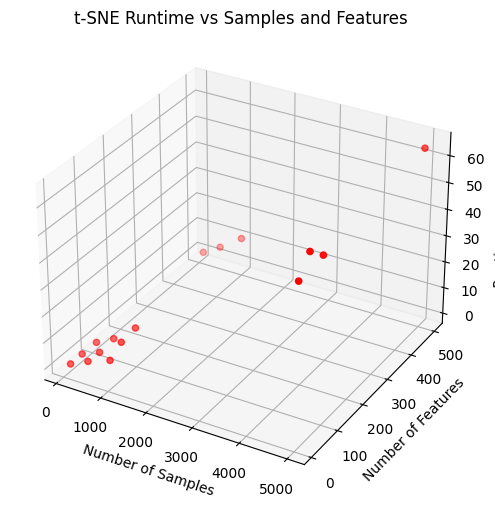

In [ ]:

import numpy as np
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to run t-SNE and return the runtime
def run_tsne(n_samples, n_features, perplexity=30):
    # Generate random data with n_samples and n_features
    X = np.random.rand(n_samples, n_features)

    # Start the timer
    start_time = time.time()

    # Run t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # End the timer
    end_time = time.time()

    # Return the time taken
    return end_time - start_time

# List of sample sizes and feature dimensions to test
sample_sizes = [100, 500, 1000, 5000]  # Increasing dataset size
feature_dimensions = [10, 50, 100, 500]  # Increasing number of features

# Store results for visualization
results = []

# Test for each combination of sample size and feature dimensions
for n_samples in sample_sizes:
    for n_features in feature_dimensions:
        runtime = run_tsne(n_samples, n_features)
        results.append((n_samples, n_features, runtime))
        print(f"t-SNE with {n_samples} samples and {n_features} features took {runtime:.2f} seconds.")

# Visualizing the results
samples = [r[0] for r in results]
features = [r[1] for r in results]
runtimes = [r[2] for r in results]

# Plot the runtime for different sample sizes and feature dimensions
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples, features, runtimes, c='r', marker='o')

ax.set_xlabel('Number of Samples')
ax.set_ylabel('Number of Features')
ax.set_zlabel('Runtime (seconds)')
ax.set_title('t-SNE Runtime vs Samples and Features')

plt.show()

03Ans)

t-SNE (t-distributed Stochastic Neighbor Embedding) is a popular technique for dimensionality reduction, particularly for visualizing high-dimensional data. However, it has several limitations and potential pitfalls:

1. Computational Complexity: t-SNE can be computationally intensive, especially for large datasets. The algorithm typically scales poorly with increasing data size, making it slower and requiring more memory as the number of samples grows. This can limit its applicability for very large datasets without prior down-sampling or other preprocessing.


2. Parameter Sensitivity: The results of t-SNE are sensitive to its hyperparameters, particularly the perplexity and learning rate. Different settings can lead to significantly different visualizations, which can mislead interpretations. Choosing appropriate parameters often requires experimentation and domain knowledge.


3. Non-Deterministic Results: t-SNE uses random initialization and stochastic methods, which means that it can produce different results on different runs, even with the same input data and parameters. This non-determinism can complicate the reproducibility of results and make it challenging to draw consistent conclusions.


4. Global Structure Loss: While t-SNE excels at preserving local structures (i.e., nearby points in high-dimensional space), it often fails to capture global structures. This can lead to misleading interpretations of clusters and relationships in the data, especially when analyzing datasets with complex relationships.


5. Difficulties with Interpretation: The axes of the t-SNE output do not have a meaningful interpretation, as they do in some other dimensionality reduction techniques like PCA. This can make it harder to derive insights from the visualizations beyond just observing clusters or groups.

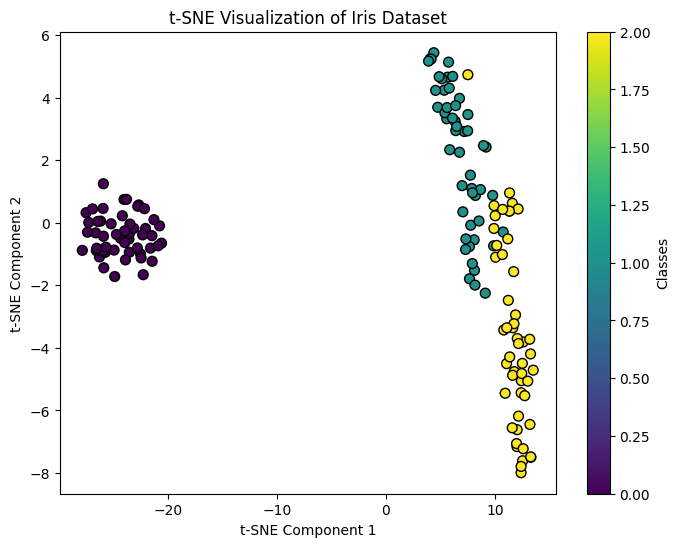

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit and transform the data
X_embedded = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Classes')
plt.show()



---
 ## Some interesting references:

 1. https://blog.paperspace.com/dimension-reduction-with-t-sne/
 2. https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
 3. https://distill.pub/2016/misread-tsne/



---


